<a href="https://colab.research.google.com/github/alonsosilvaallende/COVID-19/blob/master/Covid_19_geometric_mean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn')

In [0]:
full_data = pd.read_csv("https://covid.ourworldindata.org/data/full_data.csv")

In [0]:
from scipy.stats.mstats import gmean 
def geometric(total_cases):
  rolling_geometric_mean = []
  for s in np.arange(2,len(total_cases)):
    a = list(np.array(total_cases.iloc[0:s]))
    growth_rate = [t/s for s, t in zip(a, a[1:])]
    rolling_geometric_mean.append(gmean([t/s for s, t in zip(a, a[1:])]))
  return rolling_geometric_mean

In [0]:
Chile15_total_cases = full_data.query("location == 'Chile' & total_cases > 15")["total_cases"].copy()
Chile15_total_cases[len(Chile15_total_cases)] = 155
Italy15_total_cases = full_data.query("location == 'Italy' & total_cases > 15")["total_cases"].copy()
France15_total_cases = full_data.query("location == 'France' & total_cases > 15")["total_cases"].copy()
Switzerland15_total_cases = full_data.query("location == 'Switzerland' & total_cases > 15")["total_cases"].copy()

In [0]:
Chile15_rolling_geometric_mean = geometric(Chile15_total_cases)
Italy15_rolling_geometric_mean = geometric(Italy15_total_cases)
France15_rolling_geometric_mean = geometric(France15_total_cases)
Switzerland15_rolling_geometric_mean = geometric(Switzerland15_total_cases)

In [0]:
days15_Chile = np.arange(len(Chile15_rolling_geometric_mean))
days15_Italy = np.arange(len(Italy15_rolling_geometric_mean))
days15_France = np.arange(len(France15_rolling_geometric_mean))
days15_Switzerland = np.arange(len(Switzerland15_rolling_geometric_mean))

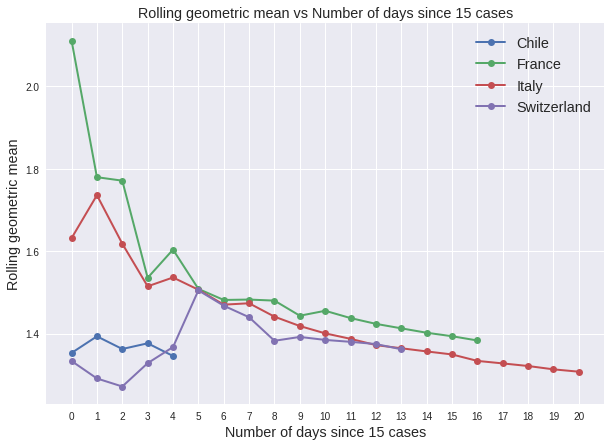

In [7]:
fig, ax = plt.subplots(figsize=(10,7))

plt.plot(days15_Chile, Chile15_rolling_geometric_mean, label='Chile', linewidth=2, marker='o')
plt.plot(days15_France, France15_rolling_geometric_mean, label='France', linewidth=2, marker='o')
plt.plot(days15_Italy, Italy15_rolling_geometric_mean, label='Italy', linewidth=2, marker='o')
plt.plot(days15_Switzerland, Switzerland15_rolling_geometric_mean, label='Switzerland', linewidth=2, marker='o')
ax.set_title('Rolling geometric mean vs Number of days since 15 cases', fontsize='x-large')
ax.set_xlabel('Number of days since 15 cases', fontsize='x-large')
ax.set_ylabel('Rolling geometric mean', fontsize='x-large')
ax.set_xticks(np.arange(len(days15_Italy)))
plt.legend(fontsize='x-large')
plt.show()

In [8]:
print(f'Chile geometric mean: {Chile15_rolling_geometric_mean[-1]}')
print(f'France geometric mean: {France15_rolling_geometric_mean[-1]}')
print(f'Italy geometric mean: {Italy15_rolling_geometric_mean[-1]}')
print(f'Switzerland geometric mean: {Switzerland15_rolling_geometric_mean[-1]}')

Chile geometric mean: 1.3456201083384316
France geometric mean: 1.3831799884513505
Italy geometric mean: 1.307408945296929
Switzerland geometric mean: 1.3618807084297542
